In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

## Bias-variance tradeoff (bias-variance dillema)

W idealnym świecie mielibyśmy dostęp do procesu generowania danych i moglibyśmy znaleźć optymalny model (a przynajmniej wybrać stopień wielomianu w regresji liniowej) oraz oszacować jego bias i variance.

- Napisz kod, który dla ustalonego stopnia wielomianu ($K$) liczy bias, variance oraz MSE tego modelu (wielkości te estymujemy podobnie jak w ćwiczeniu 0.).
- Dla jakich wartości $K$ można powiedzieć że mamy model "High variance/low bias"?
- Jaka wartość $K$ daje minimum błędu MSE?

Uwagi/wskazówki:
- Proszę użyć zakresu K od 0 do 10 (nie od 0 do 15 jak na obrazku)
- Proszę użyć zbioru testowego o rozmiarze 100. Zbiór testowy powinien być pobrany bez szumu (z użyciem funkcji "f")
- Potrzebne wzory można znaleźć też w Bishop - Pattern recognition and Machine Learning, str. 151, 3.45, 3.46, 3.47. Tutaj dla wygody je kopiujemy:
$L$ - liczba różnych zbiorów trenujących 
$N$ - liczba przykładów w zbiorze testującym 
$h(x_{n})$ - wartość prawdziwa 
$$ \overline{y}(x) = \frac{1}{N} \sum_{l=1}^{L} y^{(l)}(x) $$$$ bias^2 = \frac{1}{N} \sum_{n=1}^{N} \{ \overline{y}(x_{n}) - h(x_{n})   \}^{2}  $$$$ variance = \frac{1}{N} \sum_{n=1}^{N} \frac{1}{L} \sum_{l=1}^{L} \{ y^{(l)}(x_n) - \overline{y}(x_{n}) \}^{2} $$

- Proszę użyc zbiorów trenujących (do uczenia $y^{(l)}$) o rozmiarze 20. Proszę wytrenować $N=200$ takich funkcji.
- MSE proszę policzyć "empirycznie", czyli dla każdego K wykonując:

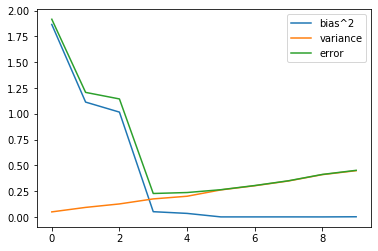

In [2]:
size_train = 20
size_test = 100
iterations = 200
degree = 10

bias = np.zeros(degree)
mse = np.zeros(degree)
var = np.zeros(degree)



for k in range(0, degree):# k - degree of polinominal
    models = []
    y = []
    p_y = []
    p_y_mean = np.zeros(size_test)
    y_mean = np.zeros(size_test)
  
    for i in range(iterations):       
        x_train = np.linspace(0, 4.5, size_train)
        y_train = 2 * np.sin(x_train * 1.5)+ np.random.randn(size_train)
        x_train = np.vstack(x_train)
        
        model = make_pipeline(PolynomialFeatures(k), LinearRegression())
        models.append(model)
        model.fit(x_train, y_train)
        
        x_test = np.linspace(0, 4.5, size_test)
        y_test = 2 * np.sin(x_test * 1.5)
        x_test = np.vstack(x_test)
        y.append(y_test)
        p_y.append(model.predict(x_test))
        p_y_mean += p_y[i]/iterations
        y_mean += y_test/iterations
    
    for i in range(iterations):
        mse[k] += sum((y[i]-p_y[i])**2) / (iterations * size_test)
        var[k] += sum((p_y[i]-p_y_mean)**2) / (iterations * size_test)
    bias[k] = sum((p_y_mean-y_test)**2/size_test)
    
plt.plot(bias, label = "bias^2")
plt.plot(var, label = "variance")
plt.plot(mse, label = "error")


plt.legend()
plt.show()